# Introduction




This tutorial will introduce you to basic operations of tensorflow which is an Open Source Software Library for Machine Intelligence. The basic concepts about regression, neuron network and convolutional neural network will be introduced and you will a chance to get hands-on experiments on them.

In data science, when we want to solve a problem using machine learning techniques, tensorflow is a powerful tool to help us save time and achieve good effect. Also, machine learning is key part for becoming an expert in data science to analyze complex data problems. For some specific problem, deep learning is the most effective way such as image classification.









# Tutorial content

In this tutorial, we will show how to intall tensorflow and use it.

We will introduce modeling of linear regression, neural network and hands-on coding in solving problems. Then we wil implement convolutional neural network model to do image classfication.

For MNIST dataset image classification problem, Neural network gets an accuray around 88%. Convolutional neural network gets an accuracy around 97% which is far more better.


We will cover the following topics in this tutorial:
* Installing tensorflow
* Tensorflow basics
* Linear regression
* Neural network for regression
* Neural network for classification
* Convolutional neural network







# Tensorflow install

Before getting started, you'll need to install tensorflow.

go to this website, and find the Pip Installation section:
https://www.tensorflow.org/versions/master/get_started/os_setup.html#download-and-setup

For max os, type following command in terminal:






Select corrent binary to install, I choose to type

Choose the right python version to install. I choose python 2:

Then installation is finished. We can run the following code to determine whether tensorflow is installed successfully:


In [59]:
import tensorflow as tf
hello = tf.constant('Congratulations, TensorFlow intalled successfully!')
sess = tf.Session()
print(sess.run(hello))

Congratulations, TensorFlow intalled successfully!


# Tensorflow basics

In this section, we will be familiar with session, variables, placeholder in tensorflow. If you want to know more about tensorflow, https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops.html is good reference for python api.

## Session in tensorflow

In tensorflow, we always need to create a session, and then use session's run method to run operations.

The belowing is matrix multipy example in tensorflow. We first generate two matrix in tensorflow, then using the matmul which is matrix multiply function to get the result. 

But unlike python, if we stop here, there wil be no multiply operation implemented. Instead, we have to create a session and run the multiply operation in the session.

The allowing code shows two ways of using session which have the same effect. 

In [71]:
import tensorflow as tf
import numpy as np

In [73]:
matrix1 = tf.constant([[3, 1,2]])
matrix2 = tf.constant([[2],
                       [4],
                       [2]])

# matrix multiply, which is similar to numpy np.dot(m1, m2)
product = tf.matmul(matrix1, matrix2)  

# method 1 to use session, create sesson object, and using run method.
sess = tf.Session()
# using run method to implement operations
result = sess.run(product)
print(result)
# close this session
sess.close()

# method 2 to use session. 
# It will automatically use sess.close() when the code segment is finished.
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)



[[14]]
[[14]]


## Variables in tensorflow

unlike python, Varaibles need to be defined with tf.variable(). Before using the variables, we have to use tf.initialize_all_variables() to initialize all variables, else it will not work.

In the belowing coding example, we use session mentioned before to run operation. We define variable state and implement add and update operations to it.

In [84]:
from __future__ import print_function
import tensorflow as tf

# define a tf variable, value is 0, variable name is counter.
state = tf.Variable(0, name='counter')

# define a constant 1
ten = tf.constant(10)

#  tf method to add state and one
new_value = tf.add(state, ten)

# assign new_value to state
update = tf.assign(state, new_value)

# must have, else variable will not work
init = tf.initialize_all_variables()  

with tf.Session() as sess:
    sess.run(init)
    for i in range(5):
        sess.run(update)
        print(sess.run(state))

10
20
30
40
50


## Placeholder in tensorflow

In the previous examples, sessions run without assigning values. If we want to assgning values in session and run it, we need to use placeholder.

So what is the difference between placeholder and variables? For tensorflow variables, we have to provide initial value when we declare it. But for placeholder, we don't have to provide an initial value and we can specify it at run time with the feed_dict argument inside Session.run. 

The below examples shows how to use placeholder with a feed_dict dictionary to input values as 7.0 and 2.0.

In [78]:
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt

# create placeholder
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

# add operation
ouput = tf.add(input1, input2)

# run session to implement add method
with tf.Session() as sess:
    print(sess.run(ouput, feed_dict={input1: [7.], input2: [2.]}))

[ 9.]




# Tensorflow operation

Next, let us consider the simplest example of linear regression and see how it works in tensorflow.

Suppose you have a traning dataset X as 1-D array, the true Y value as 1-D array. You would like to find the linear regression for X and Y.


Y = W * X + B

As we have learned in 15688, we can first initilate W0, B0 and then get the predicted value of Y0. Then compare the square difference between Y0 and Y. Then using gradient to update W0 to reduce the loss function. Through iteration, We can get a W and B which predicts most accuary.

The implementation in tensorflow is as follows:

In [111]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# create data X and Y
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*2 + 1

# set the weights W0 as a random number between -1.0 and 1.0
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# set biases B0 as a number as 0
biases = tf.Variable(tf.zeros([1]))

# this y is the predicted Y value
y = Weights*x_data + biases

# compute the mean of squred error beteen y_predicted and y_true
loss = tf.reduce_mean(tf.square(y-y_data))

# establish an optimizer to use gradient descent to optimize with learning rate as 0.5
optimizer = tf.train.GradientDescentOptimizer(0.5)

# assign the loss function loss to the optimizer
train = optimizer.minimize(loss)

# to initilize all the variables defined above
init = tf.initialize_all_variables()
### create tensorflow structure end ###

# create session in tensorflow
sess = tf.Session()
sess.run(init)          # Very important

# iterate steps as 201
for step in range(501):
    sess.run(train)
    if step % 50 == 0:
        print(step, sess.run(Weights), sess.run(biases))
        print(sess.run(loss))

0 [ 0.84348667] [ 1.99078536]
0.333761
50 [ 1.95740771] [ 1.02033484]
0.000148066
100 [ 1.99863291] [ 1.00065267]
1.52534e-07
150 [ 1.99995601] [ 1.00002098]
1.5812e-10
200 [ 1.99999857] [ 1.00000072]
1.82183e-13
250 [ 1.99999917] [ 1.00000036]
5.76961e-14
300 [ 1.99999917] [ 1.00000036]
5.76961e-14
350 [ 1.99999917] [ 1.00000036]
5.76961e-14
400 [ 1.99999917] [ 1.00000036]
5.76961e-14
450 [ 1.99999917] [ 1.00000036]
5.76961e-14
500 [ 1.99999917] [ 1.00000036]
5.76961e-14


The true W is 2, bias is 1. The predicted W is 1.99999917, Bias is 1.00000036.
loss value is 5.76961e-14.

So the implementation in tensorflow has good effect.

The figure for the modle also shows it.


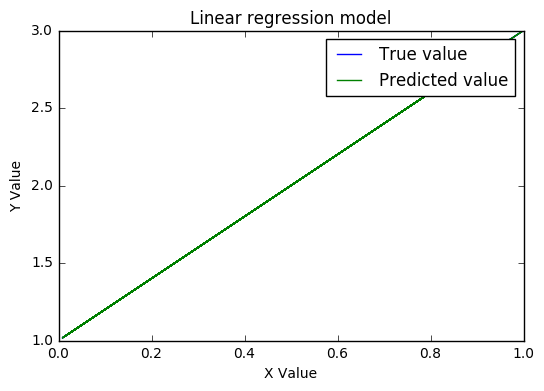

In [113]:
plt.plot(x_data, y_data, label = 'True value ')
plt.plot(x_data, sess.run(y), label = 'Predicted value')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Linear regression model')
plt.legend()
plt.show()

# Neuron network

In this part, we wil first look at basic background of neuron network, then apply neuron network for regression model, finally we will try neuron network in image classfication.

## Neuron network basics

If you want to know neuron network systematically, the course https://www.coursera.org/learn/machine-learning/home/week/4
is an excellent resource to get started.


Here, i wil explain the basic structures of neuron network. Neuron network has relationship with linear regression we mentioned before. The following picture demonstrates it.









<img src="nn1.png">
source:  https://classroom.udacity.com/courses/ud730/lessons/6379031992/concepts/64244193630923# 

In the above picture, it contains the structure of linear regression and neuron network for classification problem.

The top part is a linear regression model for classification. In this model, X is the input, Y is predicted output as W * X + b. Then we use softmax function as S(y) to generate the predicted probability and get the predicted label.

The bottom part is the structure of a two-layer neuron networl. In neuron network, we also first calcualtes W * X + B. The difference is after W * X + b, we use an activation function RELU to deal with the output. 

Then forward the output from RELU to another W2 * X + b. For the last layer, we did not need to use RELU to activate value. Finally, using softmax funcion to get the probability distribution.

Because we use W * x + b two times, so this neuron network is two layers. The stucture for this neuron network is as follows:

<img src="nn2.png">

source: http://cs231n.github.io/neural-networks-1/



## Activation function

There are many kinds of activation functions in neural network. 


<img src = "nn3.png">
source: https://www.google.com/search?q=relu+and+sigmoid+activation+function&source=lnms&tbm=isch&sa=X&ved=0ahUKEwj0za6l043QAhUN-2MKHWr5BvYQ_AUICCgB&biw=1280&bih=726#imgrc=2bhyZckfNzhU-M%3A



## Add a layer in neuron network

In this part, we practice on how to add a layer in neuron network using tensorflow. Using tf.matmul() to get W * X + b. If activation_function exists, use it to deal with data.

In [ ]:
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt


def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## Neuron network for regression

In this part, we will use neuron network for regression. 

First, we generate the X, Y data as follows.


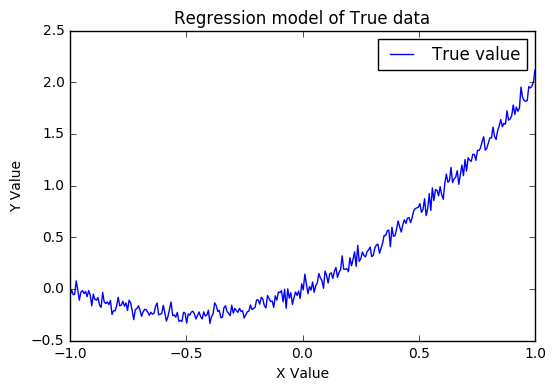

In [162]:
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) + x_data + noise

plt.plot(x_data, y_data, label = 'True value')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Regression model of True data')
plt.legend()
plt.show()

Next, Let us build a 2-layer neural network for it.

For the hidden layer, we set the units as 10. Activation function is Relu. 

Loss function is calculated by square error mean. Given a learning rate 0.1, using graident descent to minimize the loss.

The code is as following

In [173]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
    if i == 999:
        y_predicted = sess.run(prediction, feed_dict={xs: x_data, ys: y_data})
        

0.240343
0.00872532
0.00743904
0.00624387
0.00549299
0.00504228
0.00469543
0.0043788
0.0040937
0.00387793
0.0037053
0.00355864
0.00342742
0.00331353
0.00321823
0.003138
0.00306798
0.00301174
0.00296577
0.00291969


After 1000 iterations, the loss become 0.00291969.

The fitting model is as follows.


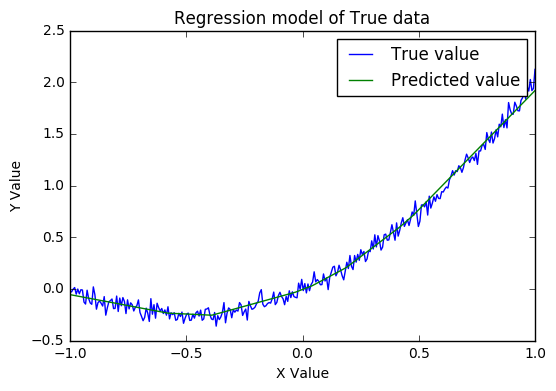

In [174]:
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) + x_data + noise

plt.plot(x_data, y_data, label = 'True value')
plt.plot(x_data, y_predicted , label = 'Predicted value')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Regression model of True data')
plt.legend()
plt.show()

# Classification

For classification problem, we have solved a similar problem in HW4 mnist.ipynb in 15688. If you want to refresh classificatiion, https://www.tensorflow.org/versions/r0.11/tutorials/mnist/beginners/index.html is a good resource.

The difference between classfication and regression for neural network is we use cross entropy as the loss function for final output y_prediction. Other parts is similar with regression part 



In [175]:
# This IS to import the image dataset mnist, this is where to do image classification. If it does not exist, 
# it will download automatically.

from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


MNIST is a simple computer vision dataset. It consists of images of handwritten digits. We would like to use neural network to find the true digits for the image.

If you want to show how to display images through np, http://g.sweyla.com/blog/2012/mnist-numpy/ is a good article. 


<img src = "mnist1.png">

The code for neural network to implement image classification.

In [180]:
accuracy_all = []
#   this is to compute accuracy for classfication
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs xs, ys to network 
# none means for any number 
#  784 is for image pixels 28 * 28
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer, input as 28 * 28 = 784, use softmax as activation function
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))   

# reduce loss function.
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

#  do 1000 iteration to do the 
for i in range(1000):
    # Learning using batch as 100 to save the time instead of the full xs, ys  
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))

0.125
0.6491
0.7438
0.7845
0.8103
0.8228
0.8355
0.8413
0.8472
0.8524
0.8552
0.8568
0.8637
0.8673
0.8697
0.8702
0.8734
0.8744
0.8777
0.8815


The final accuracy is 88.15% after 1000 iterations.


# Convolutional neuron network

After using 2- layer neural network for Mnist image dataset classification, we get an accuray as 88%. But there is a more effecitve way. That is to use convolutional neuron network. For a two-layer convolutional neuron network, it can get an accuracy as 96%.


## Convolutional neuron network structure

In image classfication, the position of digit in the image does not influence the value of digit. So we would like to the neural network to share their parameters across space to decrease influence of position. This is one of reasons  using convolutional neuron network.

Next, let us find how the convolution is done. You can also check https://classroom.udacity.com/courses/ud730/ which gives an excellent explanation of deep leanring.

<img src = "cnn1.png">
Patching Process

source = https://classroom.udacity.com/courses/ud730/lessons/6377263405/concepts/64063017560923#

In above, The rectange with depth, height and width are a image we want to classify.

We want to use the patch in graph to tranform the blue x part with depth 3 to red y part with depth k. Weights are set for the patch part, so the number of weights are much less. 



If the patch size is same with the whole rectangle, this model becomes neural network. 

The above image shows one convolution process. If we want to deeper the depth of convolutional neural network,
it will be as follows.

<img source="Desktop/cnn1.png">

<img src = "cnn2.png">
source = https://classroom.udacity.com/courses/ud730/lessons/6377263405/concepts/64063017560923#

Between each layer, they are tranformed by convolution process mentioned before. Layer size changed from 256 * 256 * 3 to 128 * 128 * 16 to... 32 * 32 * 256...

For final output, implement a classfier on it to do classify.

## Convolutional neuron network terms

Feature map: An image has three feature maps as R, G and B colors. After convolution process, it becomes Y with k feature maps like the picutre above shows.

Stride: the number of pixels each time the filter shift in the patch process.

Valid padding: after patch process, output map size is less than the input map

Same padding: after patch proces, output map size is same as the input map


Here is one example to help understand these terms.

<img src = "cnnterm2.png">
source: https://arxiv.org/pdf/1603.07285v1.pdf

This is a 2D convolution. The input size is 5 * 5. The patch size is 3 * 3. The stride is s1 = s2 = 2. The zero paddign is p1 = p2 = 1. Because same size for output and input, so it is same padding (index 1,2 means axis direction).

We can do the convolution without the zero padding as 0 around the outside, then it is valid padding.





Pooling:

Another important technique is to use pooling to improve the convolutional neural network. If we use stride 3 to do patch, we can loss many information during the pathcing process since some information are ignored.

So first we can do the 1 stride conv,then using a pooling has a pooling size and pooling stride to a similar job with the patch done before.

In the pooling, max pooling returns the max of all xi in the pooling size.


Here is one example about max_pooling.

<img src = "cnnpooling.png">
This is a 2D convolution. The input size is 5 * 5. The stride is s1 = s2 = 1. Pooling is using max pooling, its size is 3 * 3. (index 1,2 means axis direction).

source: https://arxiv.org/pdf/1603.07285v1.pdf

## Building the convolutional neural network model

Now, we have all the theory background for build cnn model.
 
For one layer, we first define the patch size and their input size and output size. Then initialize the corresponding weights and bias for this patch. Then using strides as 1 * 1 to implement the convolution process. Using a relu function to deal with the ouput and using pooling to scan the ouput to generate a new feature maps.
 
Forward this feature maps as input to next layer.

Until the last layer, using softmax to generat probability and croos entropy function to generate the loss function. Then Using AdamOptimizer to optimize it.
 
Code is as following. 

In [188]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 digit image classification
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# compute the accuracy
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

#  using stride as 1 * 1
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# using pooling as strides 2 * 2, size 2 * 2
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])


## conv1 layer ##
# patch 5x5, size is 1, out size 32
W_conv1 = weight_variable([5,5, 1,32]) 
b_conv1 = bias_variable([32])
# output size is 28x28x32
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) 
# output size is 14x14x32
h_pool1 = max_pool_2x2(h_conv1)                                         

## conv2 layer ##
# patch 5x5, in size 32, out size 64
W_conv2 = weight_variable([5,5, 32, 64]) 
b_conv2 = bias_variable([64])
# output size is 14x14x64
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) 
# output size is 7x7x64
h_pool2 = max_pool_2x2(h_conv2)                                        

## func1 layer ##
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 7, 7, 64] to [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#  this is using dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## func2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.0699
0.7809
0.8715
0.9053
0.9226
0.9296
0.9394
0.944
0.9493
0.9508
0.9554
0.9548
0.9609
0.9602
0.9632
0.9652
0.9659
0.9672
0.9693
0.969


The final accuray is around 97% which is much better than the neural network as 88%. 

# Summary and references:

This tutorial convered basic models like regression in data science using python. Then it convers deep learning models and their accuracy.

Depth of layers can be increased to get a better accuracy though two layers already gives a good result.

More references are available:

1 tensorflow: https://www.tensorflow.org/

2 Machine Learning: https://www.coursera.org/learn/machine-learning

3 deep learning: https://classroom.udacity.com/courses/ud730

4 cs231n: http://cs231n.stanford.edu/

5 a guide to convolution arithmetic: https://arxiv.org/pdf/1603.07285v1.pdf